In [19]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
def quota(inv_y, inv_yhat,name):
    rmse_ = sqrt(mean_squared_error(inv_y, inv_yhat))
    mae_=mean_absolute_error(inv_y, inv_yhat)
    r2_ = r2_score(inv_y, inv_yhat)
    print(name,'的rmse:', rmse_, ' mae:', mae_, ' R2:', r2_)

In [21]:
data0=loadmat('结果/lstm_result.mat')['true']
data1=loadmat('结果/emd-lstm_result.mat')['pred'].T
data2=loadmat('结果/eemd-lstm_result.mat')['pred'].T
data3=loadmat('结果/vmd-lstm_result.mat')['pred'].T
data4=loadmat('结果/emd-delm_result.mat')['pred']
data5=loadmat('结果/eemd-delm_result.mat')['pred']
data6=loadmat('结果/vmd-delm_result.mat')['pred']
data7=loadmat('结果/vmd-hho-delm_result.mat')['pred']

In [22]:
print(data0.shape,data1.shape,data2.shape,data3.shape,data4.shape,data5.shape,data6.shape,data7.shape)

(288, 1) (288, 1) (288, 1) (288, 1) (288, 1) (288, 1) (288, 1) (288, 1)


In [23]:
quota(data0,data1,'EMD-LSTM')
quota(data0,data2,'EEMD-LSTM')
quota(data0,data3,'VMD-LSTM')
quota(data0,data4,'EMD-DELM')
quota(data0,data5,'EEMD-DELM')
quota(data0,data6,'VMD-DELM')
quota(data0,data7,'VMD-HHO-DELM')

EMD-LSTM 的rmse: 20.89420359916908  mae: 16.56522695832407  R2: 0.9836080831029388
EEMD-LSTM 的rmse: 14.316410090466468  mae: 11.391092568370773  R2: 0.9923043313631916
VMD-LSTM 的rmse: 9.469712722785754  mae: 7.319372535940399  R2: 0.9966329333934
EMD-DELM 的rmse: 21.783265358686357  mae: 17.504249407379934  R2: 0.9821834314546534
EEMD-DELM 的rmse: 12.726077940478126  mae: 10.077915808361771  R2: 0.9939191084709755
VMD-DELM 的rmse: 8.111975654064569  mae: 6.458461333443814  R2: 0.9975292353665478
VMD-HHO-DELM 的rmse: 4.502066640288168  mae: 3.567498964304482  R2: 0.9992389697189699


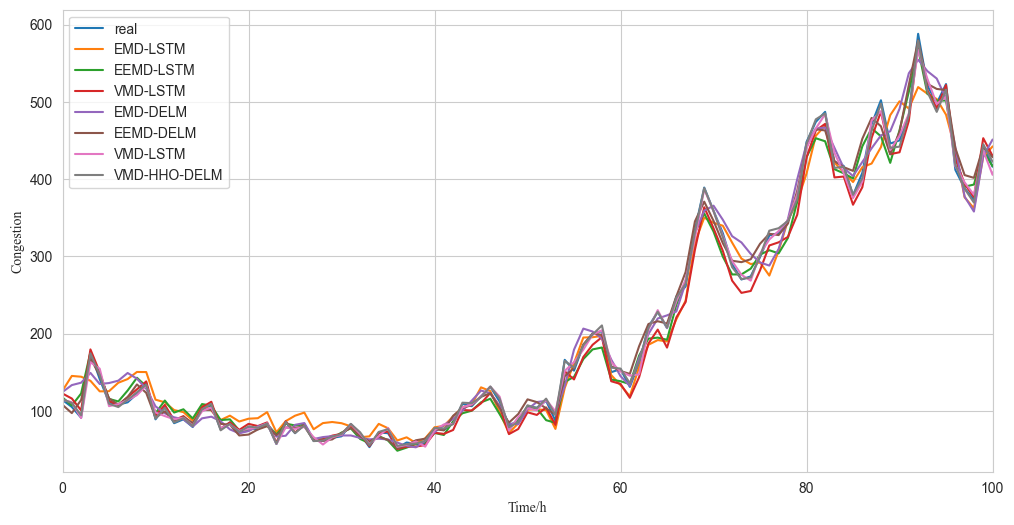

In [24]:
# In[7] 画图
plt.figure(figsize=(12,6))
plt.plot(data0,'-',label='real')
plt.plot(data1,'-',label='EMD-LSTM')
plt.plot(data2,'-',label='EEMD-LSTM')
plt.plot(data3,'-',label='VMD-LSTM')
plt.plot(data4,'-',label='EMD-DELM')
plt.plot(data5,'-',label='EEMD-DELM')
plt.plot(data6,'-',label='VMD-LSTM')
plt.plot(data7,'-',label='VMD-HHO-DELM')

plt.xlim((0,100))
# plt.grid()
plt.legend()
plt.xlabel('Time/h',fontdict={"family":"Times New Roman"})
plt.ylabel('Congestion',fontdict={"family":"Times New Roman"})
plt.savefig('figure/各预测方法对比结果图.png')
plt.show()